# Read LAS file to understand dataset
**Classifications:**
- Class 1 (Unclassified)
- Class 2 (Ground)
- Class 5 (High Vegetation)
- Class 7 (Low Point (noise))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import laspy
%matplotlib inline

# Check Basic Metadata

In [40]:
# Read the LAS/LAZ file using laspy
try:
    las = laspy.read('./data/BURW_final_ULS_reproj.laz')
    print(las.header)
except FileNotFoundError:
    print("Error: The file was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

<LasHeader(1.3, <PointFormat(1, 0 bytes of extra dims)>)>


# Inspect Available Attributes

In [41]:
print("Attributes:", las.point_format.dimension_names)
for name in las.point_format:
	print(name.name)

Attributes: <generator object PointFormat.dimension_names.<locals>.<genexpr> at 0x157413840>
X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
gps_time


# Convert to Pandas DataFrame

In [42]:
# Convert to Pandas DataFrame (extracting only key attributes)
df = pd.DataFrame({dim: las[dim] for dim in las.point_format.dimension_names})

print(df.head())

         X        Y        Z  intensity  \
0  7418907  1629868  3513449      31850   
1  7418796  1629467  3514552      30583   
2  7418548  1629979  3520465      33816   
3  7418641  1629752  3518368      35388   
4  7418636  1629763  3520559      36371   

                                       return_number  \
0  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
1  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
2  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
3  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
4  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   

                                   number_of_returns  \
0  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
1  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
2  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
3  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   
4  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, ...   

                                 scan_direction_flag  \
0  [0, 0, 0

In [43]:
print(df.describe())

                  X             Y             Z     intensity  \
count  3.326423e+07  3.326423e+07  3.326423e+07  3.326423e+07   
mean   7.455258e+06  1.606631e+06  3.526956e+06  4.377074e+04   
std    2.179105e+04  2.555591e+04  5.224222e+04  5.135543e+03   
min    7.414752e+06  1.549436e+06  2.953095e+06  1.457000e+04   
25%    7.436605e+06  1.584574e+06  3.485728e+06  4.113400e+04   
50%    7.452550e+06  1.609719e+06  3.510712e+06  4.543700e+04   
75%    7.473434e+06  1.629063e+06  3.557006e+06  4.749100e+04   
max    7.508602e+06  1.653816e+06  3.928558e+06  6.553500e+04   

       scan_angle_rank     user_data  point_source_id      gps_time  
count     3.326423e+07  3.326423e+07       33264229.0  3.326423e+07  
mean     -1.698369e+00  1.625891e+01              1.0  3.407174e+05  
std       2.529574e+01  3.229551e+01              0.0  5.970560e+02  
min      -4.500000e+01  0.000000e+00              1.0  3.398062e+05  
25%      -2.400000e+01  0.000000e+00              1.0  3.401746e


Unique Classifications: [1 2 5 7]

Number of points after subsampling: 332643


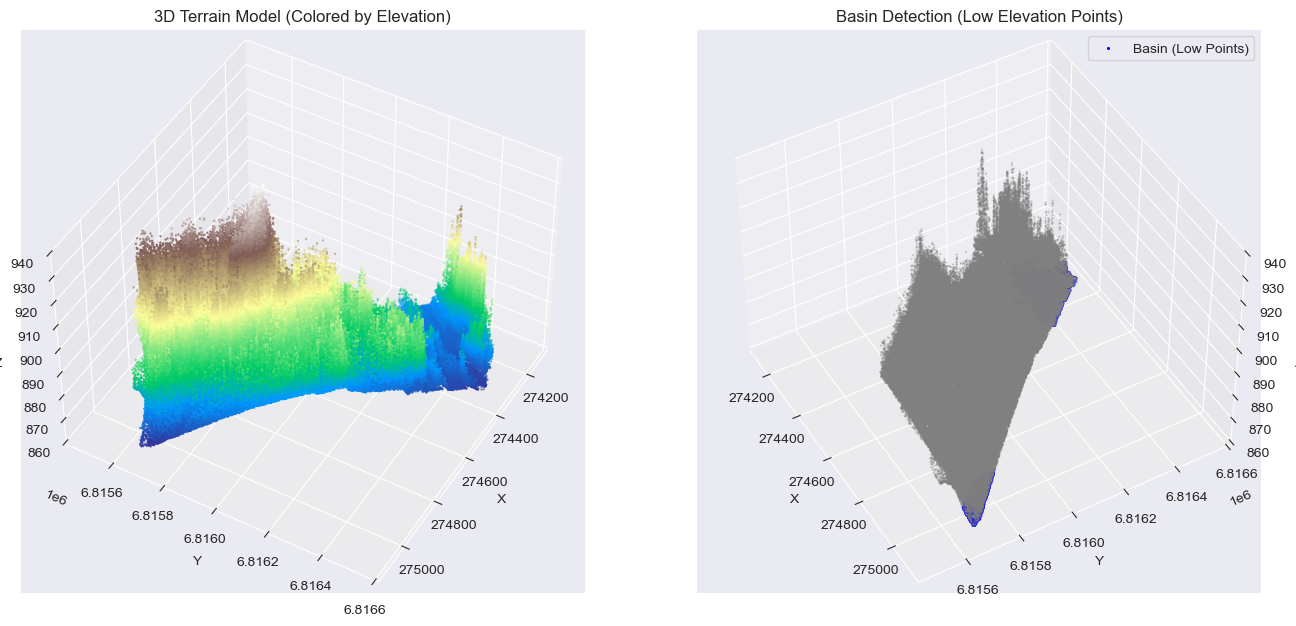

In [44]:
# Extract necessary point cloud data
x = las.x
y = las.y
z = las.z
classification = las.classification

# Print unique classifications
print(f"\nUnique Classifications: {np.unique(classification)}")

# Subsample data for efficient visualization
subsample_rate = 100  # Adjust for performance
x_subsampled = x[::subsample_rate]
y_subsampled = y[::subsample_rate]
z_subsampled = z[::subsample_rate]
classification_subsampled = classification[::subsample_rate]

print(f"\nNumber of points after subsampling: {len(x_subsampled)}")

# Detecting basins (lower elevation points)
z_min, z_max = np.percentile(z_subsampled, [5, 95])  # Focus on lowest 5% to 95% range
basin_mask = z_subsampled < np.percentile(z_subsampled, 10)  # Bottom 10% as basins

# Create the figure and subplots
fig = plt.figure(figsize=(16, 8))

# 3D Point Cloud - Colored by Elevation
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(x_subsampled, y_subsampled, z_subsampled, 
                        c=z_subsampled, s=0.5, cmap='terrain')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("3D Terrain Model (Colored by Elevation)")
ax1.view_init(elev=45, azim=30)

# 3D Basin Highlighting
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(x_subsampled, y_subsampled, z_subsampled, 
                        c='gray', s=0.5, alpha=0.3)  # Normal points
ax2.scatter(x_subsampled[basin_mask], y_subsampled[basin_mask], z_subsampled[basin_mask], 
            c='blue', s=1.5, label='Basin (Low Points)')  # Highlight low points
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.set_title("Basin Detection (Low Elevation Points)")
ax2.legend()
ax2.view_init(elev=45, azim=-30)

plt.show()

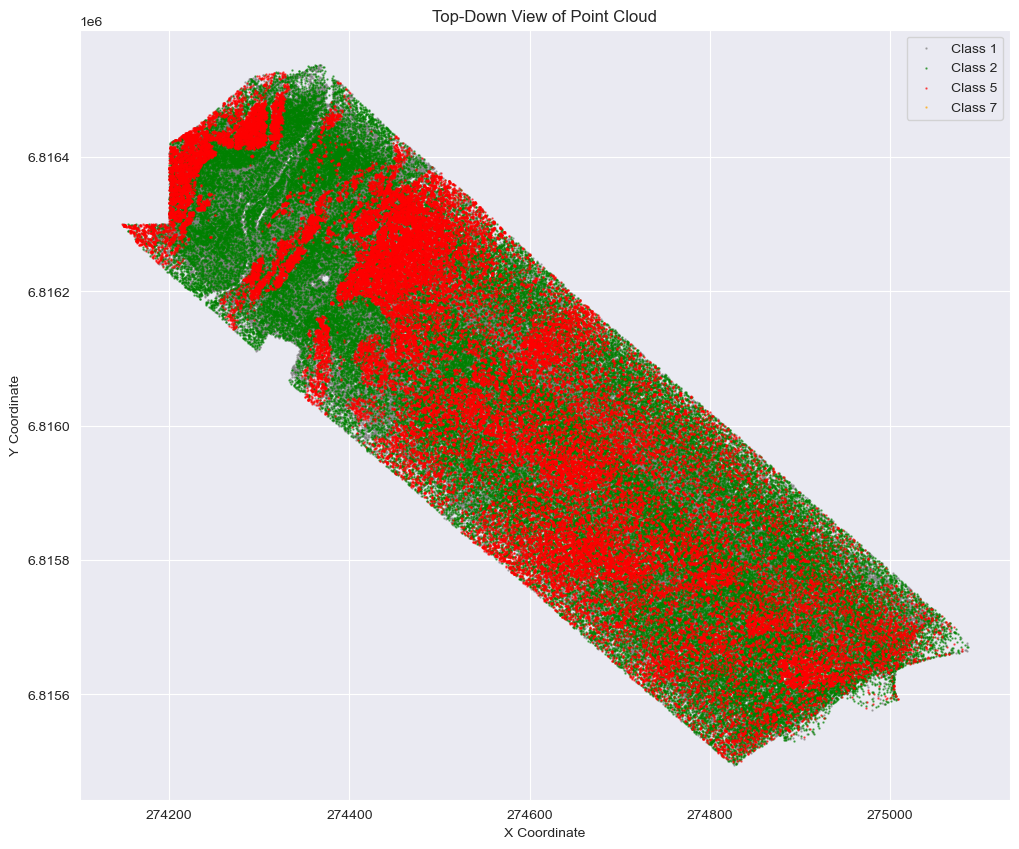

In [45]:
# Define a color map for classifications
classification_colors = {
    1: 'gray',    # Unclassified
    2: 'green',   # Ground
    5: 'red',     # High Vegetation
    7: 'orange'   # Low Point (Noise)
}

# Create the figure for top-down view
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each classification separately for better visualization
for class_val, color in classification_colors.items():
    class_mask = (classification_subsampled == class_val)
    ax.scatter(x_subsampled[class_mask], y_subsampled[class_mask], 
               s=0.5, c=color, label=f'Class {class_val}', alpha=0.6)

ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Top-Down View of Point Cloud")
ax.legend()

plt.show()

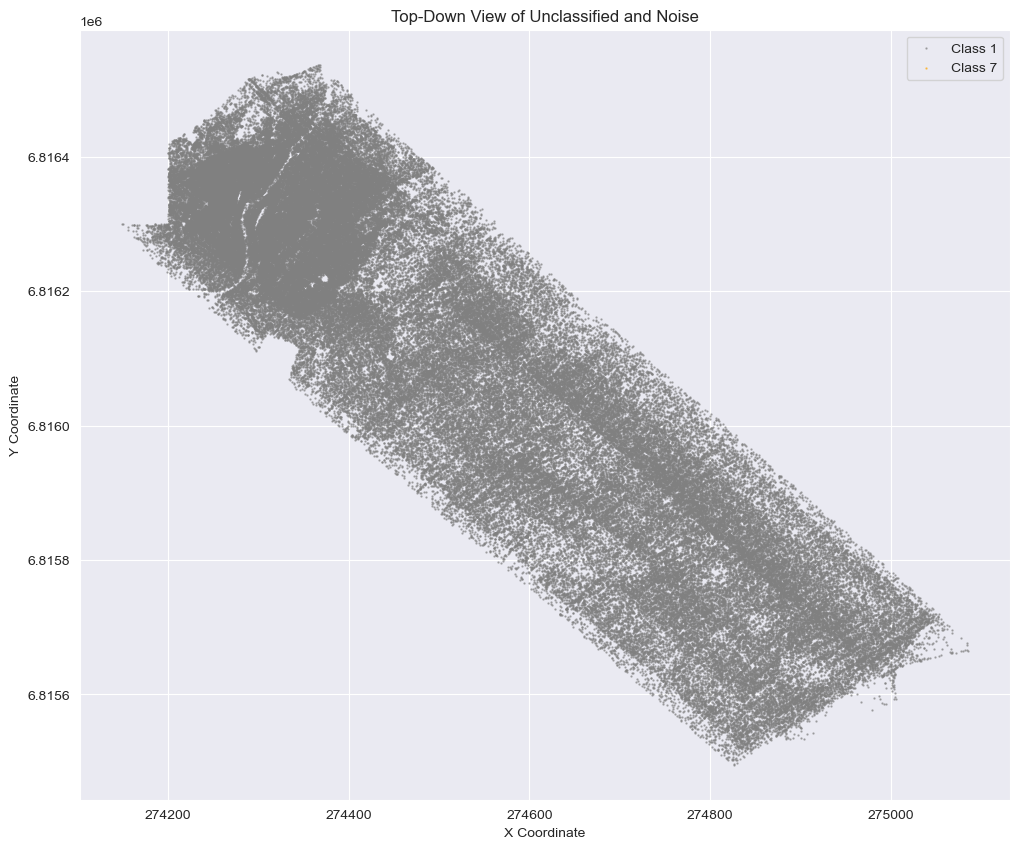

In [46]:
# Define a color map for classifications
classification_colors = {
    1: 'gray',    # Unclassified
    # 2: 'green',   # Ground
    # 5: 'red',     # High Vegetation
    7: 'orange'   # Low Point (Noise)
}

# Create the figure for top-down view
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each classification separately for better visualization
for class_val, color in classification_colors.items():
    class_mask = (classification_subsampled == class_val)
    ax.scatter(x_subsampled[class_mask], y_subsampled[class_mask], 
               s=0.5, c=color, label=f'Class {class_val}', alpha=0.6)

ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Top-Down View of Unclassified and Noise")
ax.legend()

plt.show()